In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy.stats import norm
import json
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

#reading a file
glass_data = pd.read_csv('glass.csv')
print(glass_data.head(10))
glass_data = glass_data.rename(columns={'1': 'glass_id'})
glass_data = glass_data.set_index(glass_data.glass_id)
glass_data = glass_data.drop('glass_id', axis=1)
names = ("glass_id", "n", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "index")
glass_data = pd.read_csv('glass.csv', header=None, names=names, index_col=0)
glass_data.head()

    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83   0.0    0.00    1
1   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0.0    0.00    1
2   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0.0    0.00    1
3   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07   0.0    0.00    1
4   6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07   0.0    0.26    1
5   7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17   0.0    0.00    1
6   8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24   0.0    0.00    1
7   9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30   0.0    0.00    1
8  10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40   0.0    0.11    1
9  11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09   0.0    0.24    1


,n,Na,Mg,Al,Si,K,Ca,Ba,Fe,index
glass_id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass_data.describe()

,n,Na,Mg,Al,Si,K,Ca,Ba,Fe,index
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [3]:
glass_data.mean()

n         1.518365
Na       13.407850
Mg        2.684533
Al        1.444907
Si       72.650935
K         0.497056
Ca        8.956963
Ba        0.175047
Fe        0.057009
index     2.780374
dtype: float64

<AxesSubplot:>

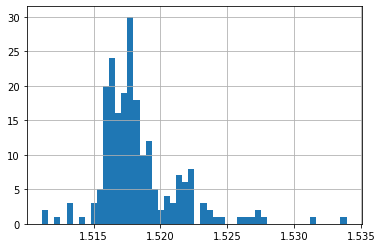

In [4]:
glass_data['n'].hist(bins = 50)

<AxesSubplot:>

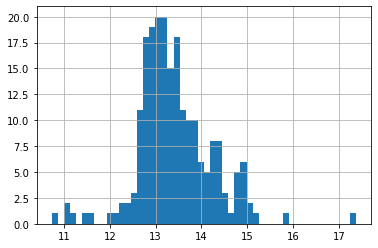

In [5]:
glass_data['Na'].hist(bins = 50)

In [6]:
print(glass_data.n.max())
glass_data[glass_data['n']>1.53390]


1.53393


,n,Na,Mg,Al,Si,K,Ca,Ba,Fe,index
glass_id,,,,,,,,,,
108,1.53393,12.3,0.0,1.0,70.16,0.12,16.19,0.0,0.24,2


In [7]:
print(glass_data.n.mean())
print(glass_data.n.min())

1.5183654205607469
1.51115


In [8]:
glass_data[glass_data['n']<1.51116]

,n,Na,Mg,Al,Si,K,Ca,Ba,Fe,index
glass_id,,,,,,,,,,
185,1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6


In [9]:
Mg_not_0 = glass_data[glass_data['Mg']>0].describe()
Mg_not_0.Mg.min()

0.33

In [10]:
K_not_0 = glass_data[glass_data['K']>0].K.min()
print("K=x0:",K_not_0)
Ba_not_0 = glass_data[glass_data['Ba']>0].Ba.min()
print("Ba=x0:",Ba_not_0)
Fe_not_0 = glass_data[glass_data['Fe']>0].Fe.min()
print("Fe=x0:",Fe_not_0)

K=x0: 0.02
Ba=x0: 0.06
Fe=x0: 0.01


In [82]:
#образцы с максимальным и минимальным показателями преломления
print(glass_data.loc[glass_data['n'] == 1.533930], "max")
print(glass_data.loc[glass_data['n'] == 1.511150], "min")

                n    Na   Mg   Al     Si     K     Ca   Ba    Fe  index
glass_id                                                               
108       1.53393  12.3  0.0  1.0  70.16  0.12  16.19  0.0  0.24      2 max
                n     Na   Mg    Al     Si    K    Ca   Ba   Fe  index
glass_id                                                              
185       1.51115  17.38  0.0  0.34  75.41  0.0  6.65  0.0  0.0      6 min


In [108]:
index =""" {
{
     "min": {
        "glass_id": 185, 
        "index": 6,
        "n": 1.51115
     },
     "max": {
        "glass_id": 108,
        "index": 2,
        "n": 1.53393
     }}"""
with open('index.json', 'w') as f2:
        json.dump(index, f2)

In [103]:
mean =""" {

  }
   "Na": {
       "mean": 13.406761,
       "min": 10.73,
       "max": 17.38
   },
   "Mg": {
       "mean": 2.676056,
       "min": 0.33,
       "max": 3.98
   },
   "Al": {
       "mean": 1.446526,
       "min": 0.29,
       "max": 3.50
   },
   "Si": {
       "mean": 72.655023,
       "min": 69.81,
       "max": 75.41
   },
   "K": {
       "mean": 0.499108,
       "min": 0.02,
       "max": 6.21
   },
   "Ca": {
       "mean": 8.957934,
       "min": 5.43,
       "max": 16.19
   },
   "Ba": {
       "mean": 0.175869,
       "min": 0.06,
       "max": 3.15
   },
    "Fe": {
       "mean": 0.057277,
       "min": 0.01,
       "max": 0.51
}}""" 
print(type(mean))
with open('mean.json', 'w') as f2:
        json.dump(mean, f2)

<class 'str'>


AxesSubplot(0.125,0.125;0.775x0.755)


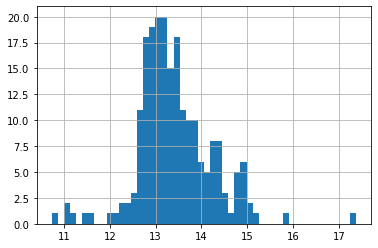

In [12]:
n_Na = glass_data[['n', 'Na']]
print(n_Na['Na'].hist(bins = 50))


<AxesSubplot:>

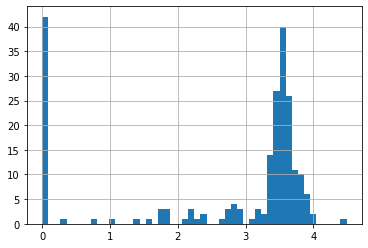

In [13]:
n_Mg = glass_data[['n', 'Mg']]
n_Mg['Mg'].hist(bins = 50)

<AxesSubplot:>

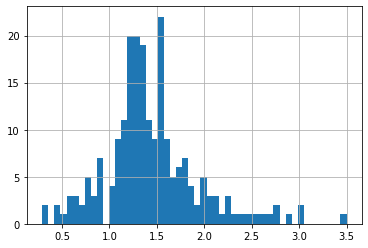

In [14]:
n_Al = glass_data[['n', 'Al']]
n_Al['Al'].hist(bins = 50)

<AxesSubplot:>

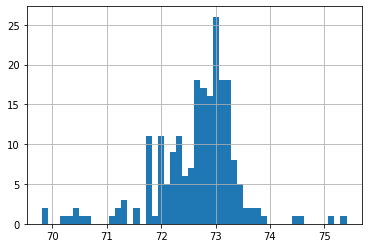

In [15]:
n_Si = glass_data[['n', 'Si']]
n_Si['Si'].hist(bins = 50)

<AxesSubplot:>

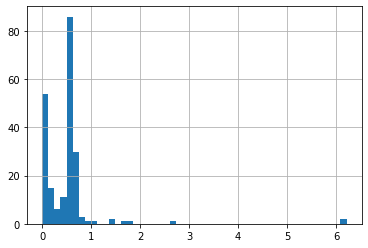

In [16]:
n_K = glass_data[['n', 'K']]
n_K['K'].hist(bins = 50)

<AxesSubplot:>

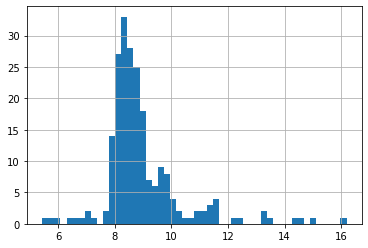

In [17]:
n_Ca = glass_data[['n', 'Ca']]
n_Ca['Ca'].hist(bins = 50)

<AxesSubplot:>

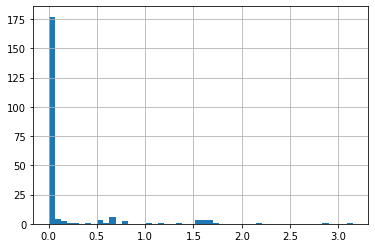

In [18]:
n_Ba = glass_data[['n', 'Ba']]
n_Ba['Ba'].hist(bins = 50)

<AxesSubplot:>

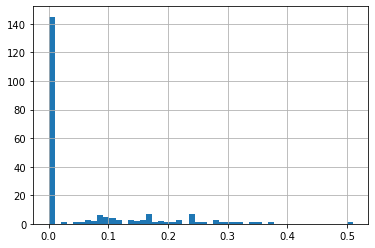

In [19]:
n_Fe = glass_data[['n', 'Fe']]
n_Fe['Fe'].hist(bins = 50)

[13.64 13.89 13.53 13.21 13.27 12.79 13.3  13.15 14.04 13.   12.72 12.8
 12.88 12.86 12.61 12.81 12.68 14.36 13.9  13.02 12.82 14.77 12.78 12.81
 13.38 12.98 13.21 12.87 12.56 13.08 12.65 12.84 12.85 12.57 12.69 13.29
 13.89 12.74 14.21 14.21 12.79 12.71 13.21 13.73 12.73 13.49 13.19 13.99
 13.21 13.58 13.72 13.2  13.43 13.14 13.21 12.45 12.99 12.87 13.48 13.39
 13.6  13.81 13.51 14.17 13.48 13.69 13.05 13.05 13.12 13.31 14.86 13.64
 13.09 13.34 13.02 13.02 13.44 13.   13.92 12.82 12.86 13.25 13.41 13.09
 14.25 13.36 13.24 13.4  13.01 12.55 12.93 12.9  13.12 13.24 12.71 13.36
 13.02 12.2  12.67 12.96 12.75 12.35 12.62 13.8  13.83 11.45 10.73 12.3
 14.43 13.72 11.23 11.02 12.64 13.46 13.1  13.41 13.24 13.72 13.3  13.56
 13.25 12.93 13.23 13.48 13.2  12.93 12.94 13.78 13.55 13.98 13.75 13.7
 13.43 13.71 13.33 13.19 13.   12.89 12.79 12.87 13.33 13.2  12.85 13.
 12.99 12.85 13.65 13.33 13.24 12.16 13.14 14.32 13.64 13.42 12.86 13.04
 13.41 14.03 13.53 13.5  13.33 13.64 14.19 14.01 12.73 1

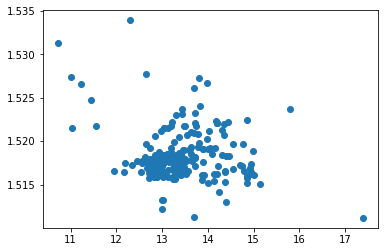

In [20]:
n_array = glass_data['n'].values
n_tr = np.transpose(n_array)
Na_array = glass_data['Na'].values
Na_tr = np.transpose(Na_array)
print(Na_tr)
plt.scatter(Na_tr, n_tr)

In [21]:
x = Na_tr
y = n_tr
A = np.vstack([x, np.ones(len(x))]).T
print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)


[[13.64  1.  ]
 [13.89  1.  ]
 [13.53  1.  ]
 [13.21  1.  ]
 [13.27  1.  ]
 [12.79  1.  ]
 [13.3   1.  ]
 [13.15  1.  ]
 [14.04  1.  ]
 [13.    1.  ]
 [12.72  1.  ]
 [12.8   1.  ]
 [12.88  1.  ]
 [12.86  1.  ]
 [12.61  1.  ]
 [12.81  1.  ]
 [12.68  1.  ]
 [14.36  1.  ]
 [13.9   1.  ]
 [13.02  1.  ]
 [12.82  1.  ]
 [14.77  1.  ]
 [12.78  1.  ]
 [12.81  1.  ]
 [13.38  1.  ]
 [12.98  1.  ]
 [13.21  1.  ]
 [12.87  1.  ]
 [12.56  1.  ]
 [13.08  1.  ]
 [12.65  1.  ]
 [12.84  1.  ]
 [12.85  1.  ]
 [12.57  1.  ]
 [12.69  1.  ]
 [13.29  1.  ]
 [13.89  1.  ]
 [12.74  1.  ]
 [14.21  1.  ]
 [14.21  1.  ]
 [12.79  1.  ]
 [12.71  1.  ]
 [13.21  1.  ]
 [13.73  1.  ]
 [12.73  1.  ]
 [13.49  1.  ]
 [13.19  1.  ]
 [13.99  1.  ]
 [13.21  1.  ]
 [13.58  1.  ]
 [13.72  1.  ]
 [13.2   1.  ]
 [13.43  1.  ]
 [13.14  1.  ]
 [13.21  1.  ]
 [12.45  1.  ]
 [12.99  1.  ]
 [12.87  1.  ]
 [13.48  1.  ]
 [13.39  1.  ]
 [13.6   1.  ]
 [13.81  1.  ]
 [13.51  1.  ]
 [14.17  1.  ]
 [13.48  1.  ]
 [13.69  1.  ]
 [13.05  1

In [22]:
n_array = glass_data['n'].values
n_tr = np.transpose(n_array)
Na_array = glass_data['Na'].values
Na_tr = np.transpose(Na_array)
print(Na_tr)
x = Na_tr
y = n_tr
A = np.vstack([x, np.ones(len(x))]).T
print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

[13.64 13.89 13.53 13.21 13.27 12.79 13.3  13.15 14.04 13.   12.72 12.8
 12.88 12.86 12.61 12.81 12.68 14.36 13.9  13.02 12.82 14.77 12.78 12.81
 13.38 12.98 13.21 12.87 12.56 13.08 12.65 12.84 12.85 12.57 12.69 13.29
 13.89 12.74 14.21 14.21 12.79 12.71 13.21 13.73 12.73 13.49 13.19 13.99
 13.21 13.58 13.72 13.2  13.43 13.14 13.21 12.45 12.99 12.87 13.48 13.39
 13.6  13.81 13.51 14.17 13.48 13.69 13.05 13.05 13.12 13.31 14.86 13.64
 13.09 13.34 13.02 13.02 13.44 13.   13.92 12.82 12.86 13.25 13.41 13.09
 14.25 13.36 13.24 13.4  13.01 12.55 12.93 12.9  13.12 13.24 12.71 13.36
 13.02 12.2  12.67 12.96 12.75 12.35 12.62 13.8  13.83 11.45 10.73 12.3
 14.43 13.72 11.23 11.02 12.64 13.46 13.1  13.41 13.24 13.72 13.3  13.56
 13.25 12.93 13.23 13.48 13.2  12.93 12.94 13.78 13.55 13.98 13.75 13.7
 13.43 13.71 13.33 13.19 13.   12.89 12.79 12.87 13.33 13.2  12.85 13.
 12.99 12.85 13.65 13.33 13.24 12.16 13.14 14.32 13.64 13.42 12.86 13.04
 13.41 14.03 13.53 13.5  13.33 13.64 14.19 14.01 12.73 1

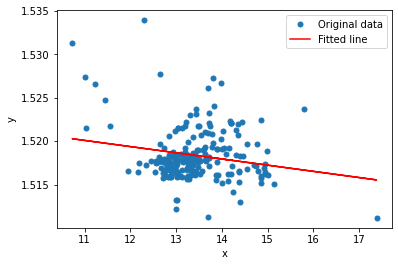

In [23]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=5)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Text(0.5, 1.0, 'Гистограмма: $ \\ mu $ =13.41$ \\ sigma = $0.81')

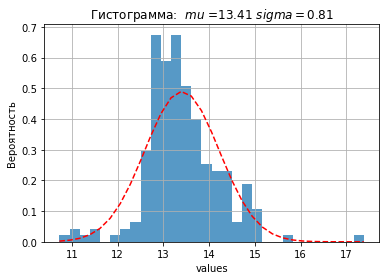

In [24]:
#построим нормальное распределение
mu = np.mean (x)
sigma =np.std(x)
num_bins = 30
n, bins, patches = plt.hist(x, num_bins,density=1, alpha=0.75) 
y = norm.pdf (bins, mu, sigma)
plt.grid(True)
plt.plot (bins, y, 'r--') # Рисовать кривую y 
plt.xlabel ('values') # Рисовать ось x 
plt.ylabel ('Вероятность') # Рисовать ось у 
plt.title ('Гистограмма: $ \ mu $ =' + str (round (mu, 2)) + '$ \ sigma = $' + str (round (sigma, 2)))

<function matplotlib.pyplot.show(close=None, block=None)>

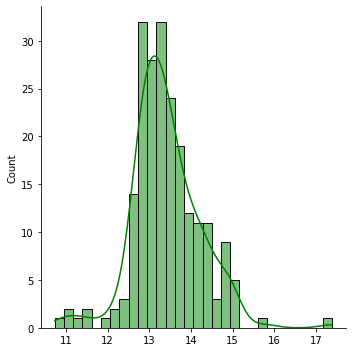

In [25]:
sns.set_palette("hls")
sns.displot(x, color = "g", bins=30, kde=True)
plt.show

In [26]:
#build a decision tree and train it on our data
df_copied = glass_data.copy()
df_copied

,n,Na,Mg,Al,Si,K,Ca,Ba,Fe,index
glass_id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [27]:
#скопировали таблицу, чтобы не работать с исходными данными
#теперь поставим задачу: нам нужно предсказать значение n по содержащимся  в нем хим элементам
#но нас интересуют п больше определенного значения (пускай больше среднего по п). Заменили числа п на 0 и 1 
df_copied.loc[(df_copied.n < 1.518353), 'n'] = 0
df_copied.loc[(df_copied.n > 1.518353), 'n'] = 1
df_copied

,n,Na,Mg,Al,Si,K,Ca,Ba,Fe,index
glass_id,,,,,,,,,,
1,1.0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,0.0,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,0.0,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,0.0,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,0.0,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,0.0,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,0.0,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.0,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [28]:
X = df_copied.drop(columns = ['n', 'index'],axis = 1)
Y = df_copied.n
print(Y)
X

glass_id
1      1.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
210    0.0
211    0.0
212    1.0
213    0.0
214    0.0
Name: n, Length: 214, dtype: float64


,Na,Mg,Al,Si,K,Ca,Ba,Fe
glass_id,,,,,,,,
1,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
2,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
3,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
4,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
5,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...
210,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
211,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
212,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [29]:
df_copied.isnull().sum()
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)
clf.score(X, Y)

1.0

[Text(1395.0, 1245.75, 'Si <= 72.46\nentropy = 0.94\nsamples = 143\nvalue = [92, 51]'),
 Text(507.27272727272725, 1019.25, 'Al <= 1.39\nentropy = 0.667\nsamples = 46\nvalue = [8, 38]'),
 Text(253.63636363636363, 792.75, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(760.9090909090909, 792.75, 'Ca <= 9.28\nentropy = 0.997\nsamples = 15\nvalue = [8, 7]'),
 Text(507.27272727272725, 566.25, 'Ca <= 5.83\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(253.63636363636363, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(760.9090909090909, 339.75, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(1014.5454545454545, 566.25, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(2282.7272727272725, 1019.25, 'Ca <= 10.695\nentropy = 0.568\nsamples = 97\nvalue = [84, 13]'),
 Text(2029.090909090909, 792.75, 'Si <= 72.855\nentropy = 0.426\nsamples = 92\nvalue = [84, 8]'),
 Text(1775.4545454545455, 566.25, 'Ca <= 8.475\nentropy = 0.753\nsamples = 37\nvalue = [29, 8]'),
 T

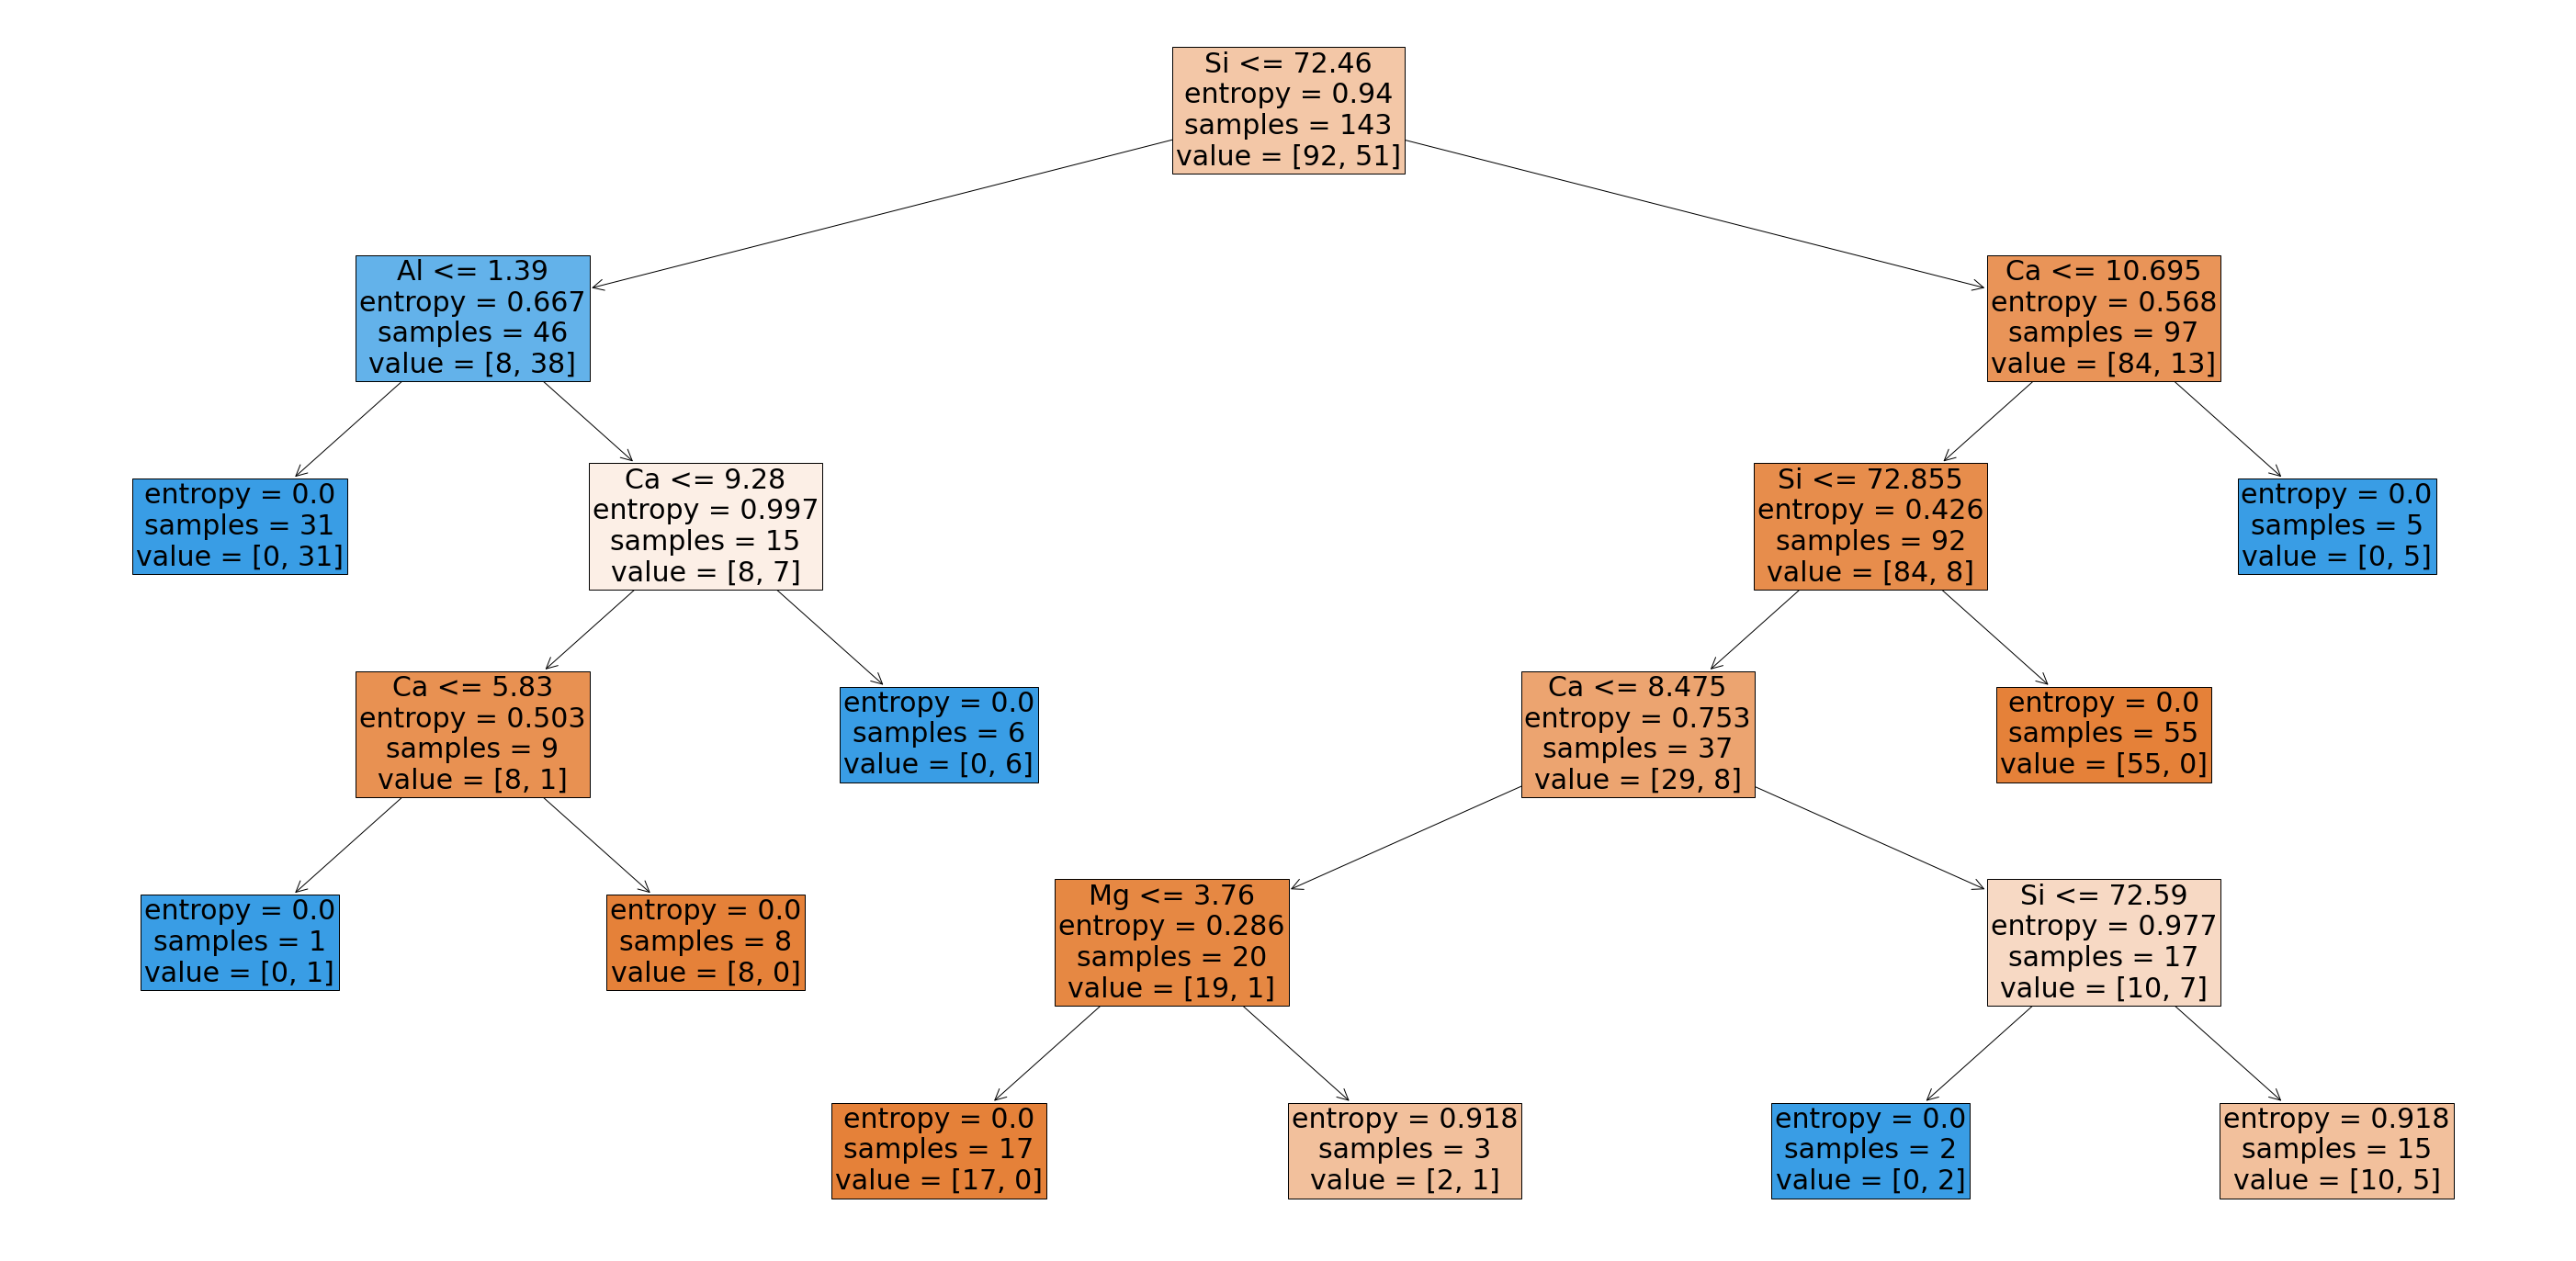

In [45]:
plt.figure(figsize=(50, 25))
tree.plot_tree(clf, fontsize=30, feature_names=list(X), filled=True)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)

(143, 8) (71, 8)


In [32]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [33]:
clf.score(X_test, y_test)

0.8873239436619719

[Text(2325.0, 1283.5, 'Si <= 72.46\nentropy = 0.94\nsamples = 143\nvalue = [92, 51]'),
 Text(744.0, 1132.5, 'Al <= 1.39\nentropy = 0.667\nsamples = 46\nvalue = [8, 38]'),
 Text(372.0, 981.5, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(1116.0, 981.5, 'Ca <= 9.28\nentropy = 0.997\nsamples = 15\nvalue = [8, 7]'),
 Text(744.0, 830.5, 'Ca <= 5.83\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(372.0, 679.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1116.0, 679.5, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(1488.0, 830.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(3906.0, 1132.5, 'Ca <= 10.695\nentropy = 0.568\nsamples = 97\nvalue = [84, 13]'),
 Text(3534.0, 981.5, 'Si <= 72.855\nentropy = 0.426\nsamples = 92\nvalue = [84, 8]'),
 Text(3162.0, 830.5, 'Ca <= 8.475\nentropy = 0.753\nsamples = 37\nvalue = [29, 8]'),
 Text(1860.0, 679.5, 'Fe <= 0.125\nentropy = 0.286\nsamples = 20\nvalue = [19, 1]'),
 Text(1488.0, 528.5, 'entropy = 0.0\nsamples = 17

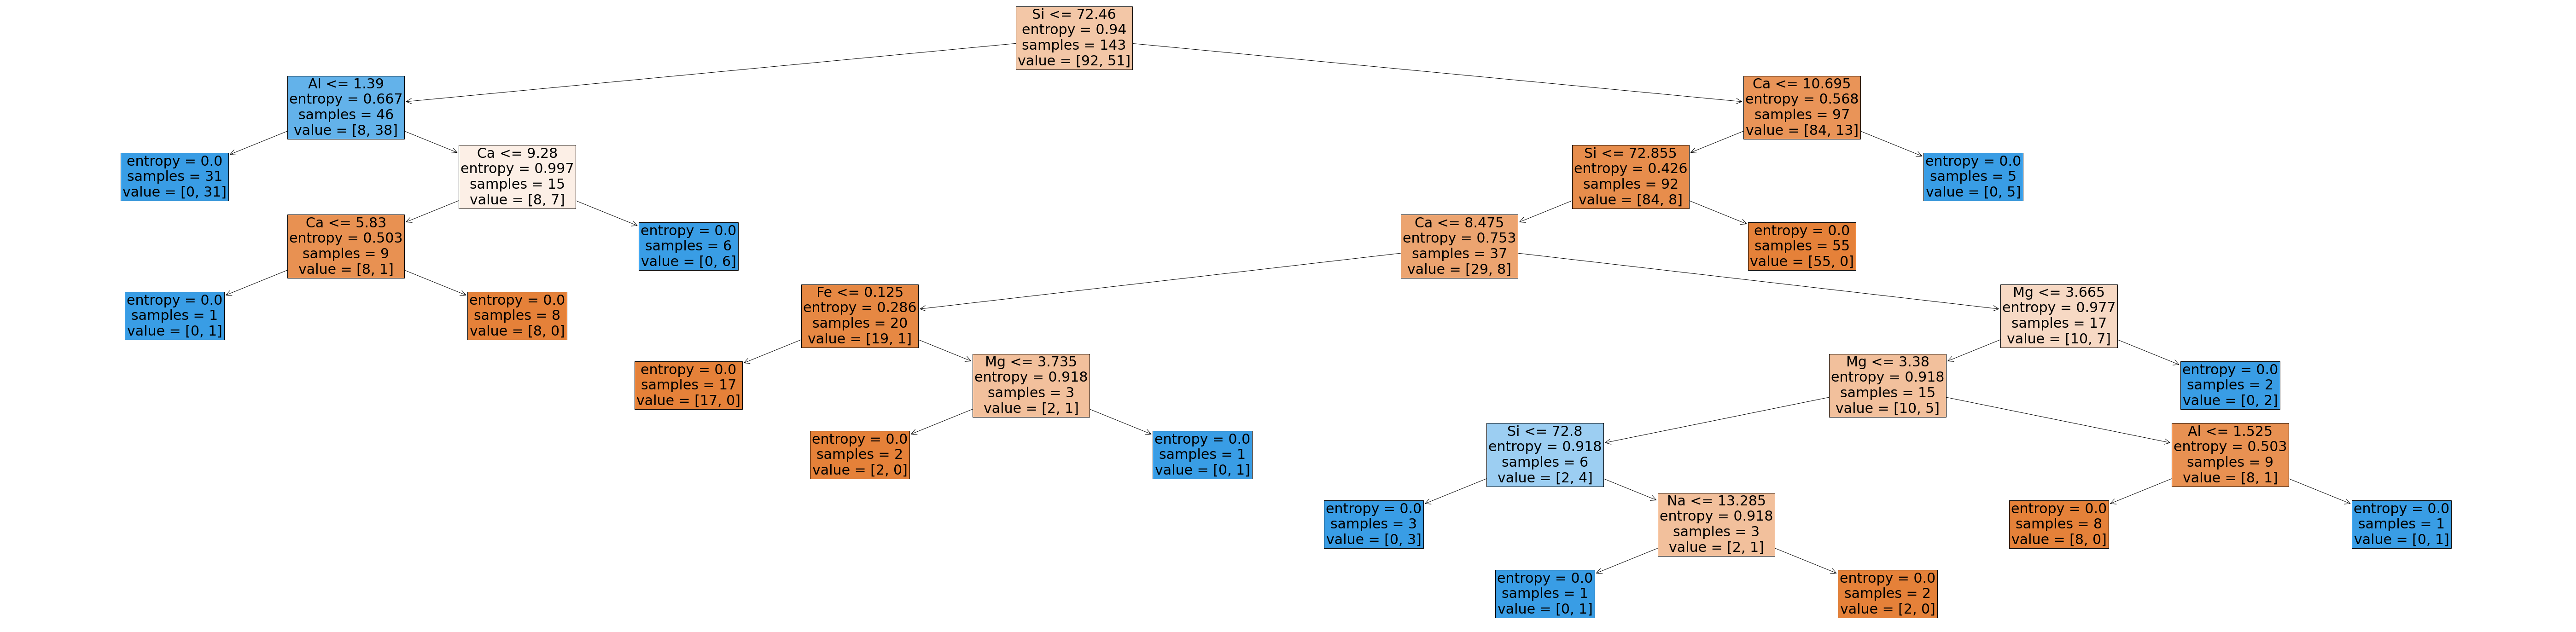

In [34]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=30, feature_names=list(X), filled=True)

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.958041958041958

In [36]:
clf.score(X_test, y_test)

0.8873239436619719

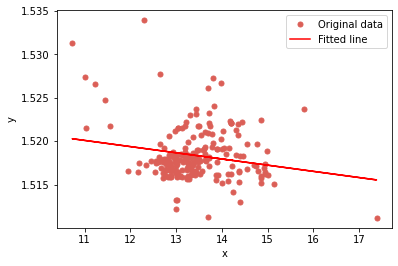

Na -0.0007136017785414027 1.527933286500623


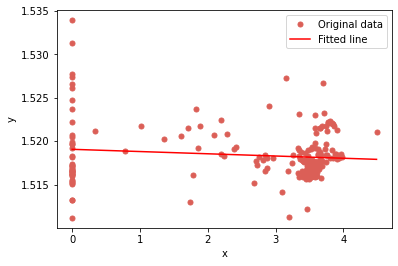

Mg -0.0002574373105529008 1.519056519441774


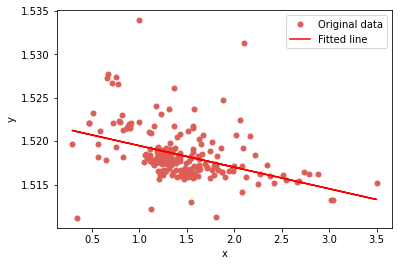

Al -0.0024776063874696742 1.5219453302386425


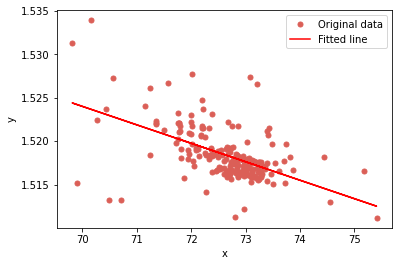

Si -0.0021252954715842314 1.6727701228287932


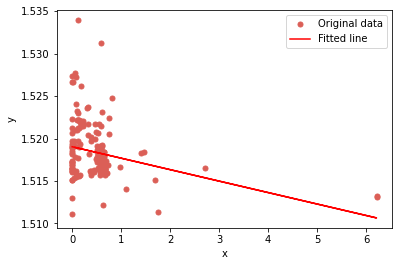

K -0.00134957598282449 1.5190362355013693


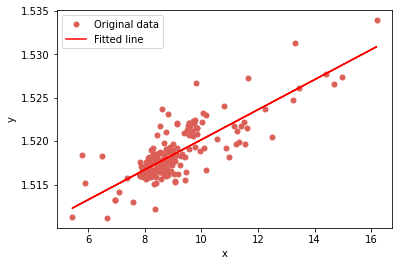

Ca 0.0017293163280067295 1.5028759988581304


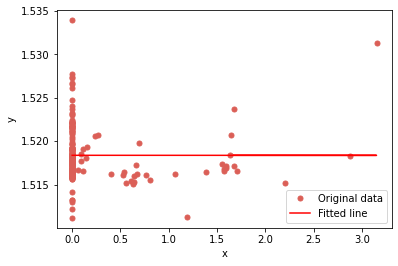

Ba -2.3576858943394664e-06 1.5183658332659513


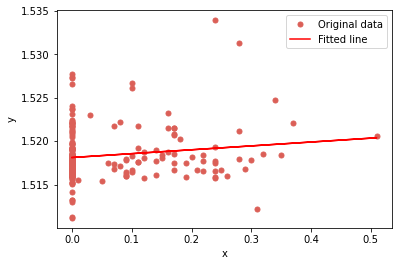

Fe 0.0044571683936838885 1.5181113203065282


In [91]:
values = ["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
for i in values:
    n_array = glass_data['n'].values
    n_tr = np.transpose(n_array)
    i_array = glass_data[i].values
    i_tr = np.transpose(i_array)
    x = i_tr
    y = n_tr
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    _ = plt.plot(x, y, 'o', label='Original data', markersize=5)
    _ = plt.plot(x, m*x + c, 'r', label='Fitted line')
    _ = plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    print(i, m, c)

In [38]:
#Подготовка данных для Множественной линейной регрессии
X = glass_data[["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]]
y = glass_data["n"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
len(X_test), len(y_test)

(43, 43)

In [55]:
#Обучение алгоритма
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)



0.8769518988814289

In [41]:
df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
df


,Coefficient
Na,0.001098
Mg,0.001627
Al,-0.000278
Si,-0.000104
K,0.001165
Ca,0.002892
Ba,0.002870
Fe,0.000358


In [74]:
#сделаем прогнозы
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
plt.plot(y_test, y_pred, color="black")
plt.plot(y_test, y_pred, color="blue", linewidth=3)
len(y_pred)

,Actual,Predicted
glass_id,,
198,1.51727,1.515888
38,1.51797,1.517777
90,1.51640,1.515681
177,1.51905,1.519218
171,1.52369,1.522818
76,1.51590,1.516162
97,1.51841,1.519812
138,1.51711,1.516425
6,1.51596,1.516296


In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.000598785074268556
Mean Squared Error: 5.424493964993956e-07
Root Mean Squared Error: 0.0007365116404371323


In [44]:
linear ={
   
   "params": {
      "bias": 1.51,
       
      "Na": 0.001098,
       
      "Mg": 0.001627,
      "Al": -0.000278,
      "Si": -0.000104,
       "K": 0.001165,
      "Ca": 0.002892,
      "Ba": 0.002870,
      "Fe": 0.000358,
   
      "Mean Absolute Error": 0.000598785074268556,
      "Mean Squared Error": 5.424493964993956e-07,
    "Root Mean Squared Error": 0.0007365116404371323}}
   

with open('linear.json', 'w') as f2:
    json.dump(linear, f2)

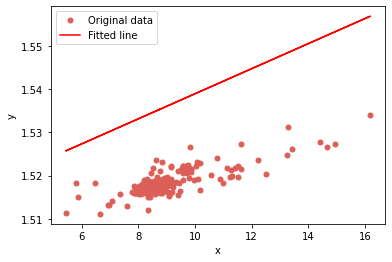

In [102]:
n_array = glass_data['n'].values
n_tr = np.transpose(n_array)
i_array = glass_data["Ca"].values
i_tr = np.transpose(i_array)
x = i_tr
y = n_tr
   
m= 0.002892
_ = plt.plot(x, y, 'o', label='Original data', markersize=5)
_ = plt.plot(x, m*x + 1.51, 'r', label='Fitted line')
_ = plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()